In [1]:
"""
@author: faurand, chardes, ehagensieker
"""
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from mlp import MLP
from layer import Layer

In [2]:
#create the multilayer perceptron
mlp = MLP()
mlp.add_layer(Layer(10,1)) # hidden layer with ten units, which receives one input
mlp.add_layer(Layer(1,10)) # output layer with one unit, which receives ten inputs

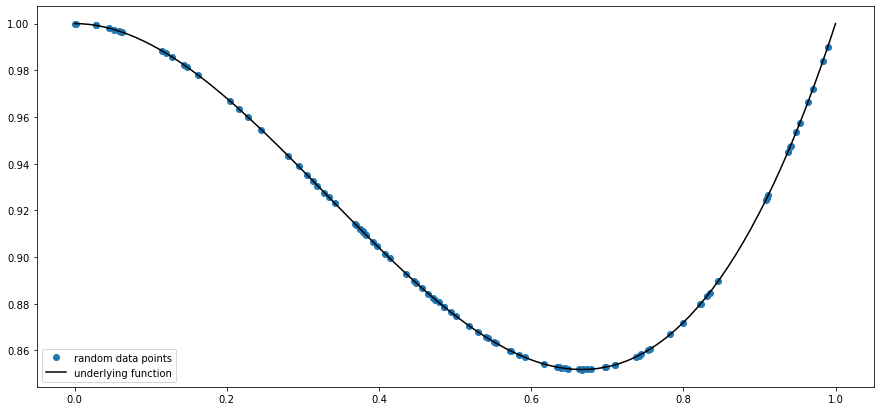

In [3]:
#build the data set
f = lambda x: x**3-x**2+1

x = np.random.rand(100)
t = f(x)

# plot the data points
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x,t,'o',label='random data points')

# plot the underlying function
x2 = np.linspace(0,1,100)
ax.plot(x2,f(x2),'k',label='underlying function')

# display the plot
ax.legend()
plt.show()

In [4]:
preds_0 = np.array([mlp.forward_step(np.array([[i]])) for i in x]).flatten()

In [5]:
loss_average = []

#training the network for 150 epochs
for epoch in range(150):
    
    error = []
    
    #in each epoch, loop through all datapoints once
    for i,y in zip(x,t):
        activation = mlp.forward_step(np.array([[i]]))
        mse = 1/2*(activation-y)**2
        mse_prime = activation-y
        mlp.backpropagation(mse_prime,0.01)
        error.append(mse)
        
    loss_average.append(np.mean(error))
    if epoch%15 == 0:
        print(f'epoch: {epoch}, loss: {loss_average[epoch]}')

epoch: 0, loss: 0.28897975580261787
epoch: 15, loss: 0.001478129361478121
epoch: 30, loss: 0.001028404767886361
epoch: 45, loss: 0.00100193409190288
epoch: 60, loss: 0.0009937236928440126
epoch: 75, loss: 0.0009870430628330612
epoch: 90, loss: 0.0009815971969600263
epoch: 105, loss: 0.0009782111850353175
epoch: 120, loss: 0.000977329533175495
epoch: 135, loss: 0.0009773577825326065


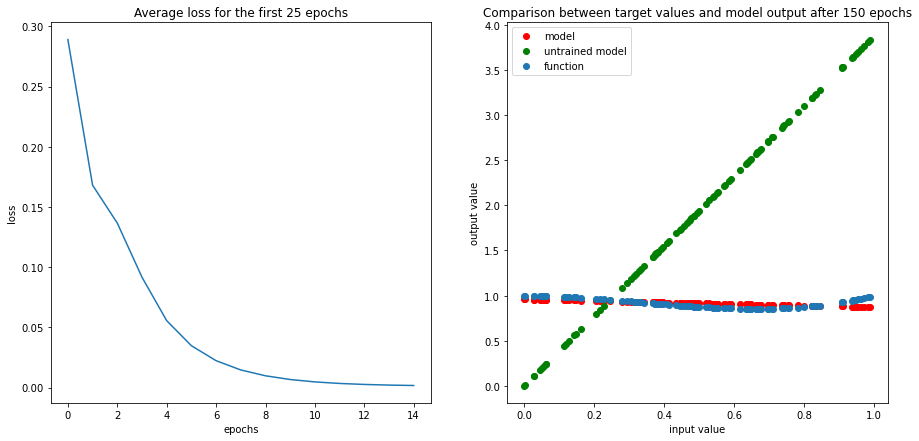

In [7]:
#visualize the training progress
fig, ax = plt.subplots(1,2,figsize=(15,7))

ax[0].plot(loss_average[:15])
ax[0].set(title='Average loss for the first 25 epochs', xlabel='epochs', ylabel='loss')

preds = np.array([mlp.forward_step(np.array([[i]])) for i in x]).flatten()
ax[1].plot(x,preds,'o',label='model', color='red')
ax[1].plot(x,preds_0,'o',label='untrained model', color='green')
ax[1].plot(x,t,'o',label='function')
ax[1].set(title='Comparison between target values and model output after 150 epochs', xlabel='input value', ylabel='output value')
ax[1].legend()

plt.show;